In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv(r'C:\Users\admin\Desktop\tele_churn\Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Customer Churn')

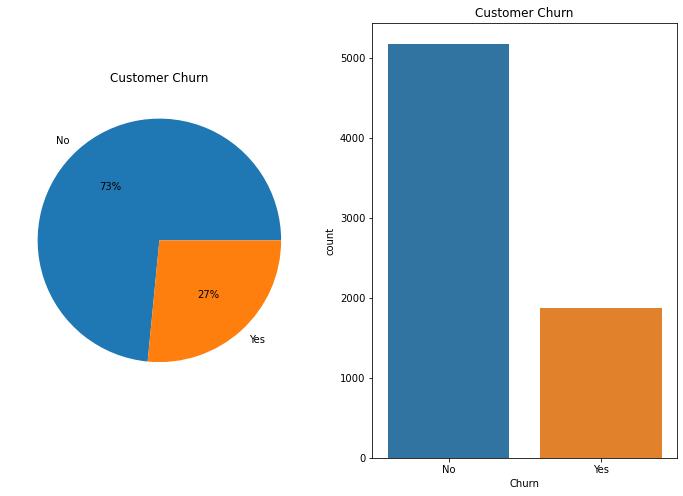

In [4]:
#Figuring
f = plt.figure(figsize=(12 ,8))
ax = f.add_subplot(121)
labels = ['No', 'Yes']
churn = df.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
ax.set_title('Customer Churn')

ax = f.add_subplot(122)
sns.countplot(df.Churn)
ax.set_title('Customer Churn')

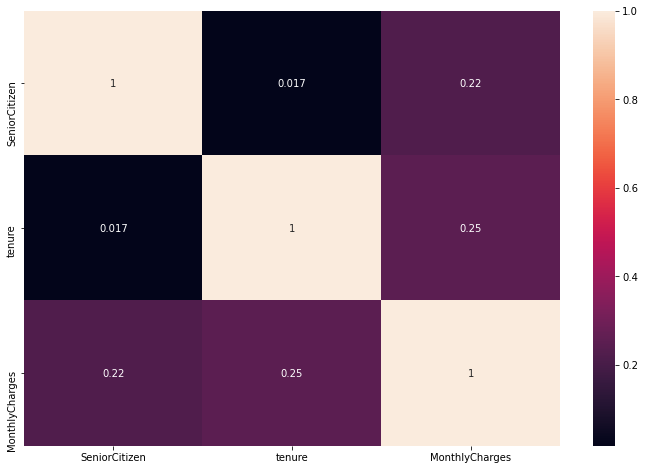

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

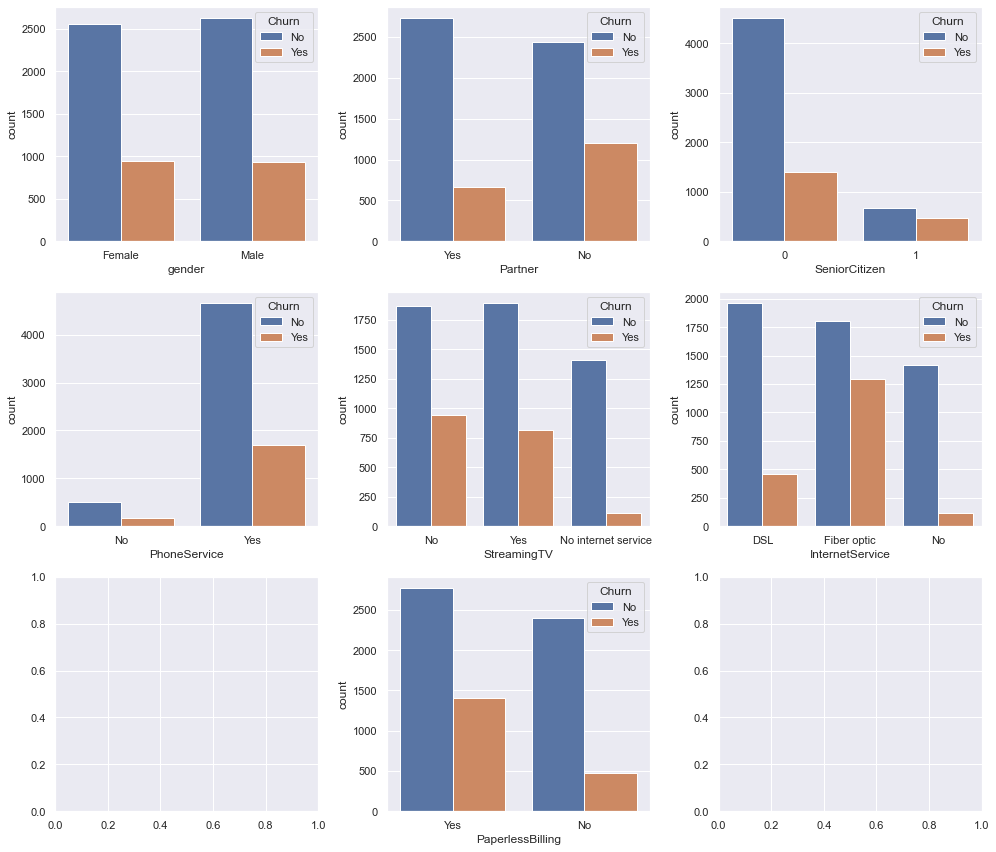

In [6]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

In [7]:
#Preprocessing
df = df.drop(['customerID'], axis=1)
objList = df.select_dtypes(include = "object").columns
le = LabelEncoder()

df[objList] = df[objList].apply(le.fit_transform)


In [8]:
scale = MinMaxScaler()
df = pd.DataFrame(scale.fit_transform(df.values), columns=df.columns, index=df.index)

In [9]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
#Making list of classifiers
classifiers=[]
scores=[]

In [11]:
# logistic regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
print(log_model.score(X_train, y_train), log_model.score(X_test, y_test))
classifiers.append('Logistic Reg')
scores.append(log_model.score(X_test,y_test))

0.8065317713880015 0.7955997161107168


In [12]:
# SVM
svm_model = SVC(C=100)
svm_model.fit(X_train, y_train)
print(svm_model.score(X_train, y_train), svm_model.score(X_test, y_test))
classifiers.append('SVM')
scores.append(svm_model.score(X_test,y_test))

0.9350372736954207 0.7452093683463449


In [13]:
# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
print(tree_model.score(X_train, y_train), tree_model.score(X_test, y_test))
classifiers.append('Decision Tree')
scores.append(tree_model.score(X_test,y_test))

0.9980475683351083 0.7366926898509581


In [14]:
# Random Forest
random_model = RandomForestClassifier()
random_model.fit(X_train, y_train)
print(random_model.score(X_train, y_train), random_model.score(X_test, y_test))
classifiers.append('Random Forest')
scores.append(random_model.score(X_test,y_test))

0.9980475683351083 0.7835344215755855


In [16]:
mse = pd.DataFrame(columns=['train', 'test'], index=['Logistic Regression', 'Gradient Boosting', 'Decision Tree',  'Random Forest'])
model_dict = {'Logistic Regression': log_model, 'SVM':svm_model, 'Decision Tree': tree_model, 'Random Forest' : random_model}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = model.score(X_train, y_train)*100
    mse.loc[name, 'test'] = model.score(X_test, y_test)*100
 
mse

,train,test
Logistic Regression,80.653177,79.559972
Gradient Boosting,NaN,NaN
Decision Tree,99.804757,73.669269
Random Forest,99.804757,78.353442
SVM,93.503727,74.520937


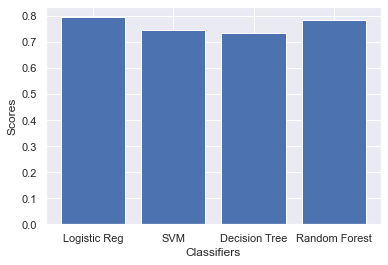

In [17]:
#Plotting scores
plt.bar(classifiers,scores)
plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.show()